## Ансамбли

12 марта, Школа Лингвистики НИУ ВШЭ

Татьяна Шаврина



Ансамблевые методы - это мета-алгоритмы, которые объединяют несколько методов машинного обучения в одну прогностическую модель, чтобы уменьшить дисперсию (bagging), смещение (boosting) или улучшить прогнозы нескольких моделей (stacking). 

Методы ансамбля можно разделить на две группы: *последовательные* методы ансамбля, в которых базовые модели генерируются последовательно (например, AdaBoost), и *параллельные* методы ансамбля, в которых базовые модели генерируются параллельно (например, Random Forest). 

Основной мотивацией последовательных методов является использование зависимости между базовыми моделями (учащимися, эстиматорами), поскольку общую производительность можно повысить путем взвешивания ранее неправильно маркированных примеров с большим весом. Основной мотивацией параллельных методов является использование независимости между базовыми учениками, поскольку ошибка может быть значительно уменьшена путем усреднения.

Большинство ансамблевых методов используют единый базовый алгоритм обучения для получения однородных базовых обучающихся, то есть обучающихся того же типа, что приводит к *однородным ансамблям*. Есть также некоторые методы, которые используют гетерогенные модели, то есть модели разных типов, что приводит к *гетерогенным ансамблям*. Чтобы методы ансамбля были более точными, чем отдельные модели, базовые модели должны быть как можно более точными и максимально разнообразными.


![](https://drive.google.com/uc?export=view&id=1TloyBRHqMXzx7BUMw6IXRf1i8DCt8F4s)

In [0]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier, BaggingRegressor, RandomTreesEmbedding,GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk import word_tokenize

In [0]:
# загрузим данные, с которыми будем работать

data_url = 'https://raw.githubusercontent.com/TatianaShavrina/hse_ml_m1/master/ensembles/complaints.csv'
data = pd.read_csv(data_url, sep='\t')
data.head()

,COMPLAINT_ID,DATE,PRODUCT_ID,ISSUE_ID,cleaned_text
0,3178905,03/13/2019,44,318,go year . contact advis never took loan . advi...
1,3175952,03/12/2019,44,349,"mail valid debt xx/xx/19 valid receiv , receiv..."
2,3174747,03/09/2019,44,16,xx/xx/xxxx appli receiv onlin loan bluechip fi...
3,3173291,03/08/2019,44,16,xx/xx/xxxx appli receiv onlin loan . loan amou...
4,3172221,03/07/2019,44,48,told husband left bill . debt would pay within...


### Самое простое - Voting Classifier

In [0]:
y = data["PRODUCT_ID"]
X = data["cleaned_text"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import FunctionTransformer

In [0]:
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

voting = Pipeline([
    ('vect', CountVectorizer( analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    ('to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)), 
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf', eclf),
    ])
voting = voting.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
predictions = voting.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.61
Recall:   0.60
F1-measure:   0.59
Accuracy:   0.60


In [0]:
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

voting = Pipeline([
    ('vect', CountVectorizer( analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    ('to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)), 
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf', eclf),
    ])
voting = voting.fit(X_train, y_train)
predictions = voting.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Precision:   0.65
Recall:   0.65
F1-measure:   0.64
Accuracy:   0.64


In [0]:
# подстановка новых признаков в sklearn классификатор

In [0]:
# способ 1 - через токенизацию

In [0]:
import nltk
sno = nltk.stem.SnowballStemmer('english')

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
def stem_tokenizer(text):
    return [sno.stem(t) for t in word_tokenize(text)]

In [0]:
#пример как это делать с pymorphy2
'''
def pos_tokenizer(text):
    return [morph.parse(t)[0].tag for t in word_tokenize(text)]
'''

In [0]:
clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=stem_tokenizer, analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf', SVC(class_weight="balanced", random_state =42)),
    ])
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.65
Recall:   0.65
F1-measure:   0.65
Accuracy:   0.65


In [0]:
# способ 2 - через новый класс 

In [0]:
import gensim
# let X be a list of tokenized texts (i.e. list of lists of tokens)
model = gensim.models.Word2Vec(X_train, size=100)

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = 100

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in word_tokenize(words) if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [0]:
clf = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.31
Recall:   0.30
F1-measure:   0.30
Accuracy:   0.30


In [0]:
# feature union

from sklearn.pipeline import FeatureUnion

In [0]:
clf = Pipeline([
    ('feats', FeatureUnion([
        ('tfidf', TfidfVectorizer(ngram_range=(1,3), analyzer='word', max_features=200)),
        ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v))])),
    ('clf', SVC(class_weight="balanced", random_state =42))
    ])

clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.66
Recall:   0.65
F1-measure:   0.65
Accuracy:   0.65


### Задание

Попробуйте поднять качество классификации до 70% с помощью известных вам методов препроцессинга и Voting

### Bagging

Bagging означает агрегацию на разных выборках (бутстрап). Одним из способов уменьшения дисперсии оценки модели является усреднение нескольких оценок. Например, мы можем обучить $M$ разных деревьев $f_m$ на разных подмножествах данных (выбранных случайным образом с заменой) и вычислить ансамбль:

\begin{equation}
   f(x) = \frac{1}{M}\sum_{m=1}^{M}f_m(x) 
\end{equation}

Bagging использует bootstrap выборок для получения подмножеств данных для обучения базовых учащихся. Для агрегирования результатов базовых моделей, в  бэггинге используется голосование для классификации и усреднение для регрессии.


In [0]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [0]:
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target
    
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

Accuracy: 0.63 (+/- 0.02) [Decision Tree]
Accuracy: 0.70 (+/- 0.02) [K-NN]
Accuracy: 0.67 (+/- 0.07) [Bagging Tree]
Accuracy: 0.68 (+/- 0.06) [Bagging K-NN]


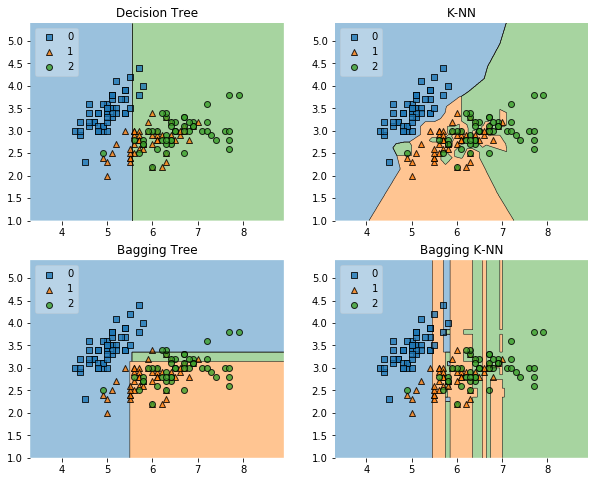

In [0]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

На приведенном выше рисунке показана граница решений для decision tree и k-NN classifiers вместе с их baggibg-ансамблями, примененными к набору данных Iris. Дерево решений показывает параллельные границы осей, в то время как ближайшие соседние $k = 1$ подходят близко к точкам данных. Обучающие ансамбли были обучены с использованием базовых оценщиков в 10 базовых моделей с подвыборкой обучающих данных в размере 80%  и 80%  подвыборкой признаков. Ансамбль дерева решений достиг более высокой точности по сравнению с ансамблем на k-NN, потому что k-NN менее чувствительны к изменениям на обучающих выборках и поэтому их называют «стабильными учениками» (*stable learners*). Объединение стабильных учащихся менее выгодно, так как ансамбль не поможет улучшить производительность обобщения.

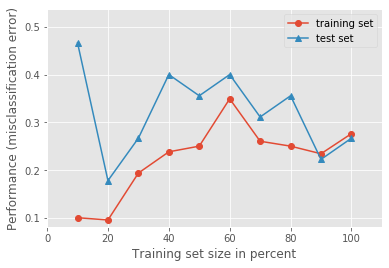

In [0]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

На рисунке выше показаны кривые обучения для bagging tree ensemble. Мы можем видеть среднюю ошибку около 0,3 для кривой обучения и U-образную кривую ошибки для данных тестирования. Наименьший разрыв между ошибками в обучении и в тесте происходит около 90% от размера тренировочного набора.

In [0]:
#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

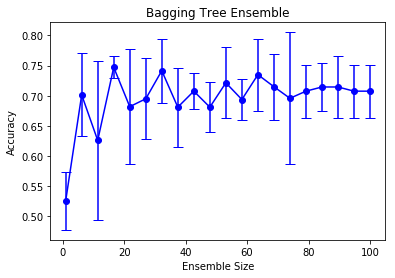

In [0]:
plt.figure()
_, caps, _ = plt.errorbar(np.linspace(1,100,20), bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

На рисунке выше показано, как accuracy теста улучшается с размером ансамбля. Основываясь на результатах кросс-валидации, мы можем видеть, что точность возрастает примерно до 20 эстиматоров, а затем постепенно выходит на плато. Таким образом, добавление базовых эстиматоров сверх 20 только увеличивает вычислительную сложность без увеличения точности для набора данных Iris.

Часто используется такой тип ансамблевых алгоритмов как леса случайных деревьев. В **случайных лесах** каждое дерево в ансамбле строится из выборки, взятой с заменой (bootstrap sample) из обучающего набора. Кроме того, вместо использования всех признаков, случайное подмножество признаков выбирается для рандомизации дерева. В результате bias леса немного увеличивается, но из-за усреднения менее коррелированных деревьев его дисперсия уменьшается, что приводит к общей лучшей модели.

В **extremely randomized trees** алгоритмическая случайность делает еще один шаг вперед: пороги расщепления рандомизированы. Вместо того, чтобы искать самый различительный порог (discriminative threshold), пороги рисуются случайным образом для каждого признака-кандидата, и лучший из этих случайно сгенерированных порогов выбирается в качестве правила разделения. Это обычно позволяет немного уменьшить дисперсию модели за счет большего увеличения смещения.

### Boosting

Boosting относится к семейству алгоритмов, которые способны преобразовывать слабые модели в сильные модели. Основным принципом бустинга является подбор последовательности слабых моделей (которые лишь немного лучше, чем случайные предположения -- например, небольшие деревья решений), к взвешенным версиям данных, где больший вес придается примерам, которые были ошибочно классифицированы на более ранних раундах. Прогнозы моделей затем объединяются посредством взвешенного большинства голосов (классификация) или взвешенной суммы (регрессия) для получения окончательного прогноза. Принципиальное различие между бустингом и методами комитета (committee methods), такими как bagging, состоит в том, что базовые модели обучаются последовательно на взвешенной версии данных

In [0]:
import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [0]:
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target
    
#XOR dataset
#X = np.random.randn(200, 2)
#y = np.array(map(int,np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)))
    
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

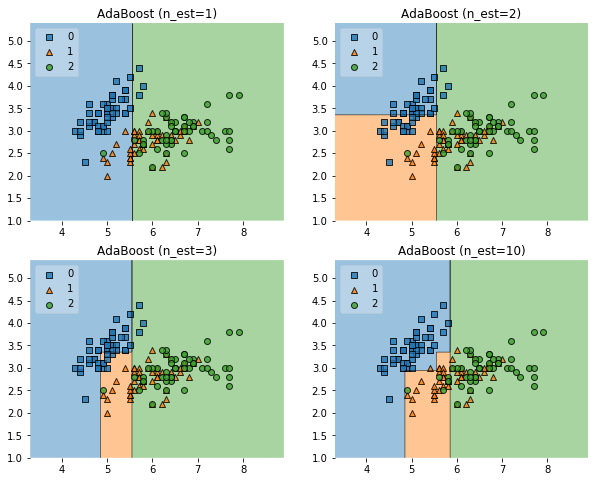

In [0]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)   
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=boosting, legend=2)
    plt.title(label)

plt.show()

Алгоритм AdaBoost показан на рисунке выше. Каждая базовая модель состоит из дерева решений с глубиной 1, таким образом, данные классифицируются на основе порога признака, который разделяет пространство на две области, разделенные линейной поверхностью решения, параллельной одной из осей.

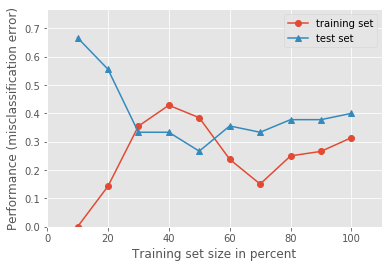

In [0]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=10)
        
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model=False, style='ggplot')
plt.show()

In [0]:
#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

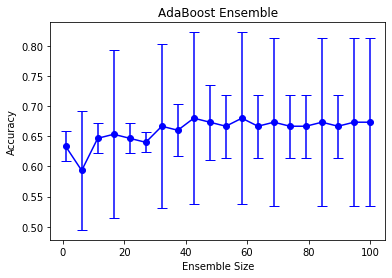

In [0]:
plt.figure()
(_, caps, _) = plt.errorbar(np.linspace(1,100,20), bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()

На рисунке выше показано, как точность теста улучшается с размером ансамбля.



**Gradient Tree Boosting** - это обобщение бустинга на произвольные дифференцируемые функции потерь. Его можно использовать как для задач регрессии, так и для задач классификации.


Реализация алгоритма - XGBoost

![](https://drive.google.com/uc?export=view&id=1DtdO9jh-XOWEXdzirfD3PwF-CJj6j2Gq)

In [0]:
import xgboost as xgb

In [0]:
clf = xgb.XGBClassifier(objective='multi:softmax')
clf.fit(X_train,  y_train)
predictions = clf.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))

### Stacking

Стекинг - это метод обучения ансамбля, который объединяет несколько моделей классификации или регрессии с помощью мета-классификатора или мета-регрессора. Модели базового уровня обучаются на основе полного обучающего набора, затем метамодель обучается на выходах модели базового уровня в качестве функций. Базовый уровень часто состоит из различных алгоритмов обучения, и поэтому стековые ансамбли часто неоднородны.

In [0]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.95 (+/- 0.02) [Stacking Classifier]


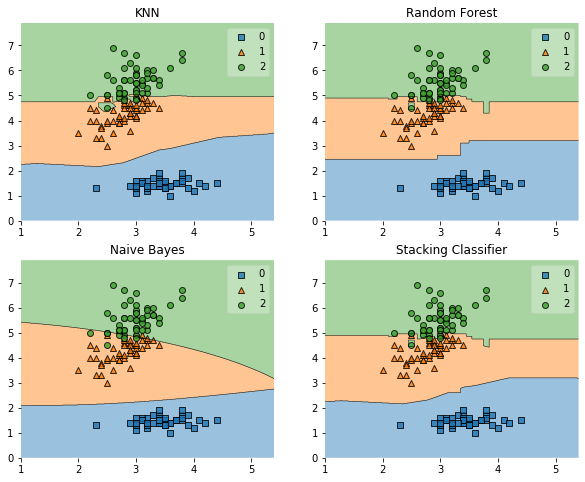

In [0]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

plt.show()

Ансамбль стэкинга показан на рисунке выше. Он состоит из базовых классификаторов k-NN, случайного леса и наивного байесовского алгоритма, прогнозы которых объединяются с помощью Lostic Regression в качестве метаклассификатора

Мы можем видеть смешение границ решений, достигнутых классификатором стека.


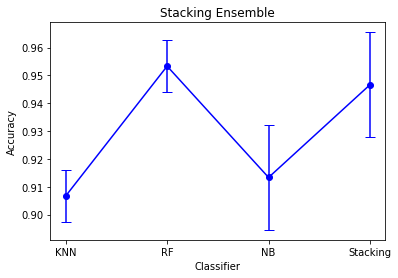

In [0]:
#plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

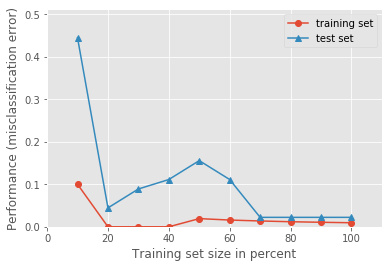

In [0]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

Мы можем видеть, что stacking достигает более высокую точность, чем отдельные классификаторы, и, основываясь на кривых обучения, не показывает признаков переобучения.

## Самостоятельная работа

Основываясь на своих знаниях об ансамблировании различных моделей, на данных из complaints.csv достигните наилучшего результата

In [0]:

data_url = 'https://raw.githubusercontent.com/TatianaShavrina/hse_ml_m1/master/ensembles/complaints.csv'
data = pd.read_csv(data_url, sep='\t')
data.head()
y = data["PRODUCT_ID"]
X = data["cleaned_text"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Voting Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import FunctionTransformer

In [0]:
clf1 = LogisticRegression(multi_class='multinomial', solver='sag', random_state=1) 
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

voting = Pipeline([
    ('vect', CountVectorizer( analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    ('to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)), 
    ('clf', eclf),
    ])
voting = voting.fit(X_train, y_train)
predictions = voting.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))



Precision:   0.66
Recall:   0.66
F1-measure:   0.66
Accuracy:   0.66


In [0]:
import nltk
nltk.download('punkt')
sno = nltk.stem.SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def stem_tokenizer(text):
    return [sno.stem(t) for t in word_tokenize(text)]

In [0]:
clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=stem_tokenizer, analyzer='word', max_features=1000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    ('clf', SVC(class_weight="balanced", random_state =42,kernel = 'poly')),
    ])
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.74
Recall:   0.73
F1-measure:   0.73
Accuracy:   0.73


Увеличение max_features у векторизатора сильнее всего увеличивает показатели, однако и время работы тоже увеличивается. Далее буду использовать векторизатор с параметром max_features=1000, так как с ним, более-менее, удалось достигнуть баланса между качеством и скоростью. Здесь, например, качество удалось повысить почти что на 10%. 

In [0]:
from sklearn.pipeline import FeatureUnion

In [0]:
clf = Pipeline([
    ('feats', FeatureUnion([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), analyzer='word', max_features=1000, min_df = 4, max_df = 0.3)),
        ("cv", CountVectorizer(tokenizer=stem_tokenizer, analyzer='word', max_features=1000, min_df = 4, max_df = 0.3))])),
    ('clf1', RandomForestClassifier(n_estimators=100, random_state=1))
    ])

clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))



Precision:   0.73
Recall:   0.72
F1-measure:   0.72
Accuracy:   0.72


Bagging

In [0]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [0]:
tfidf = TfidfVectorizer(ngram_range=(1,3), analyzer='word', max_features=1000, min_df = 4, max_df = 0.3)
X_tfidf = tfidf.fit_transform(X)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.fit_transform(X_test)

In [0]:
cvec = CountVectorizer(tokenizer=stem_tokenizer, analyzer='word', max_features=1000, min_df = 4, max_df = 0.3)
X_cv_train = cvec.fit_transform(X_train)
X_cv = cvec.fit_transform(X)
X_cv_test = cvec.fit_transform(X_test)

In [0]:
clf1 = LogisticRegression(multi_class='multinomial', solver='sag', random_state=1, penalty = 'l2', max_iter = 400)
clf2 = RandomForestClassifier(max_depth = 8, min_samples_leaf = 2)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=15, max_samples=0.9, max_features=0.7) 
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=15, max_samples=0.9, max_features=0.9)

In [0]:
label = ['LR', 'RFC', 'Bagging LR', 'Bagging RFC']
clf_list = [clf1, clf2, bagging1, bagging2]


for clf, label in zip(clf_list, label):        
    scores = cross_val_score(clf, X_tfidf, y, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        


Accuracy: 0.64 (+/- 0.01) [LR]
Accuracy: 0.60 (+/- 0.04) [RFC]
Accuracy: 0.65 (+/- 0.02) [Bagging LR]
Accuracy: 0.61 (+/- 0.04) [Bagging RFC]


Boosting

In [0]:
import xgboost as xgb

In [0]:
clf = xgb.XGBClassifier(objective='multi:softmax', max_depth=8, subsample = 0.6)
clf.fit(X_train_tfidf,  y_train)
predictions = clf.predict(X_test_tfidf)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.30
Recall:   0.31
F1-measure:   0.28
Accuracy:   0.30


Stacking

In [0]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = SVC(random_state=1, probability=True)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], use_probas=True, average_probas=False,
                          meta_classifier=lr)

In [0]:
label = ['KNN', 'Random Forest', 'SVC', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_tfidf, y, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
   

Accuracy: 0.49 (+/- 0.01) [KNN]
Accuracy: 0.63 (+/- 0.03) [Random Forest]
Accuracy: 0.65 (+/- 0.02) [SVC]
Accuracy: 0.50 (+/- 0.00) [Stacking Classifier]


## Что посмотреть

https://m.habr.com/ru/company/ods/blog/336168/

https://neurohive.io/ru/osnovy-data-science/ansamblevye-metody-begging-busting-i-steking/

https://blog.statsbot.co/ensemble-learning-d1dcd548e936